# Module 3 Python Practice 

**Let's see some equivalents of the R practice activities in Python using plotnine library. The ggplot code is almost the same except some syntax differences for Python.** 

In [1]:
from plotnine import *
import pandas as pd

In [2]:
tips_data =pd.read_csv("/dsa/data/all_datasets/tips.txt")

In [3]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**Activity 1:** Plot a bar chart where the height is the number of tips per day.

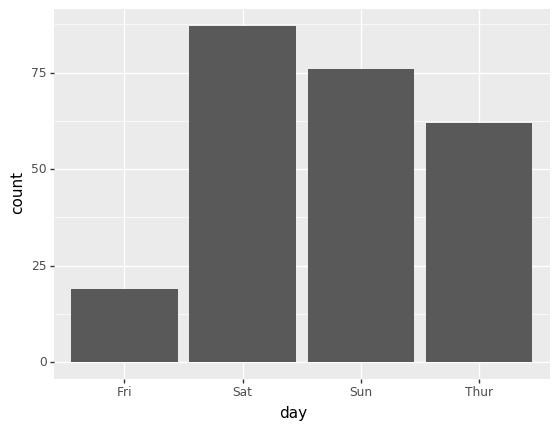

<ggplot: (8737014238556)>

In [4]:
ggplot(tips_data, aes(x="day")) + geom_bar( stat ="count" )

**Activity 2:** Plot a bar chart where the height of the bar shows the total amount of tips per day.

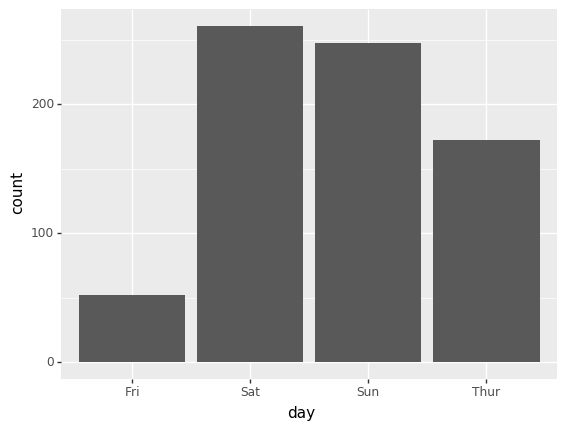

<ggplot: (-9223363299840537193)>

In [5]:
ggplot(tips_data, aes(x="day", weight="tip" )) + geom_bar()

**Activity 3:** Plot a bar chart where the height of the bar shows the total amount of tips per day.

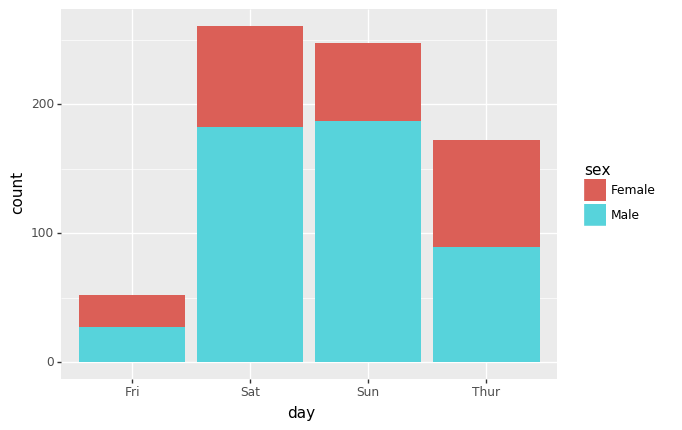

<ggplot: (-9223363299845288760)>

In [6]:
ggplot(tips_data, aes(x="day", weight = "tip")) + geom_bar(aes(fill="sex"))

This was a stacked bar chart and it does not provide a good comparison between two categories; we know that aligned bars give better visual comparison. So let's change this:

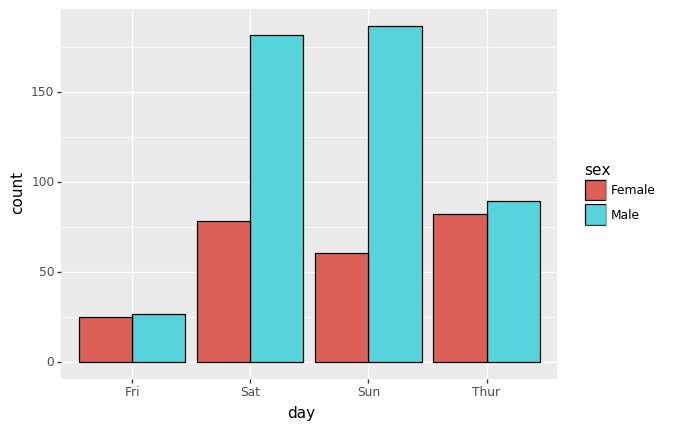

<ggplot: (-9223363299845284534)>

In [7]:
p = ggplot(tips_data, aes(x="day", weight = "tip")) + geom_bar(aes(fill="sex"), position= "dodge", colour="black")
p

This is better. So we can see Fridays are not a good day for waiters according to this data set. Let's change the colors by adding scales.

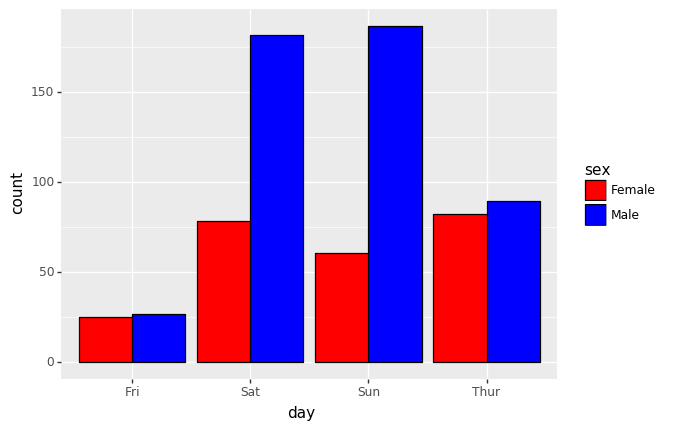

<ggplot: (-9223363299845329727)>

In [8]:
p + scale_fill_manual(values=["red", "blue"])

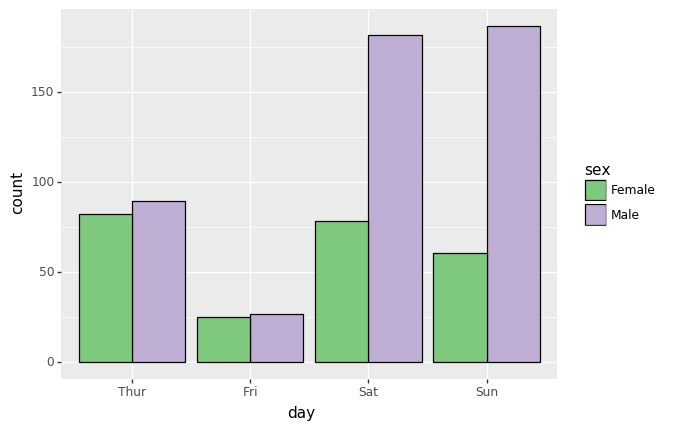

<ggplot: (8737009450276)>

In [9]:
p + scale_fill_brewer(type = "qual", palette="Accent") + scale_x_discrete(limits = ["Thur", "Fri", "Sat", "Sun"])

**Activity 4:** Plot a scatter plot of tips vs. total bill using sex and smoker status as facets.

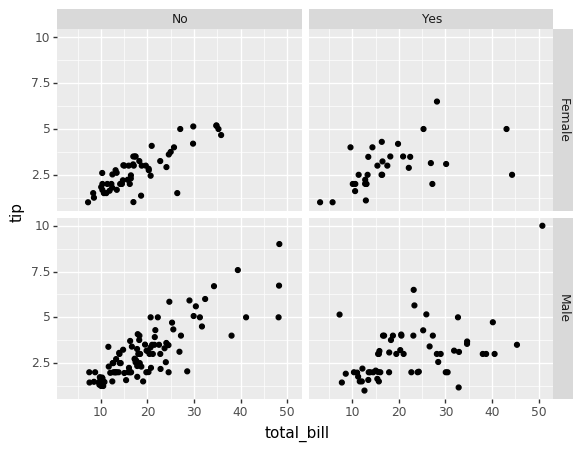

<ggplot: (-9223363299845288907)>

In [10]:
ggplot(tips_data, aes(x="total_bill", y="tip")) + geom_point() + facet_grid(["sex", "smoker"])

For the fitted curve, we need the scikit-misc package; we can install it within the notebook like following: 

In [11]:
!pip install scikit-misc

     |████████████████████████████████| 8.8MB 2.4MB/s eta 0:00:01


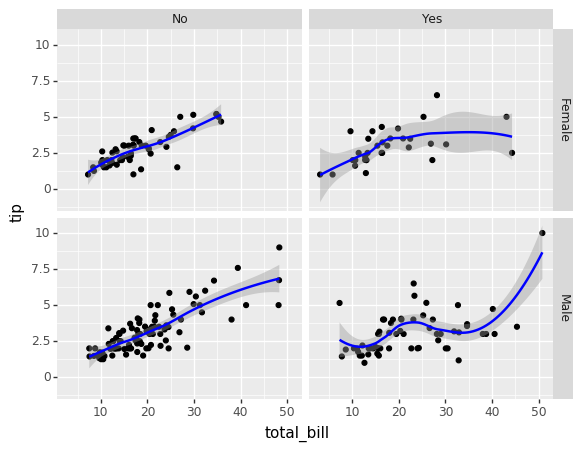

<ggplot: (8736968631002)>

In [12]:
ggplot(tips_data, aes(x="total_bill", y="tip")) + geom_point() + facet_grid(["sex", "smoker"]) + \
geom_smooth(method="loess", colour="blue")

**Activity 5:** Draw a scatter plot for variables total_bill and tip using sex and smoker as facets. Map the 'day' and 'size' attributes to color and shape visual variables, respectively.

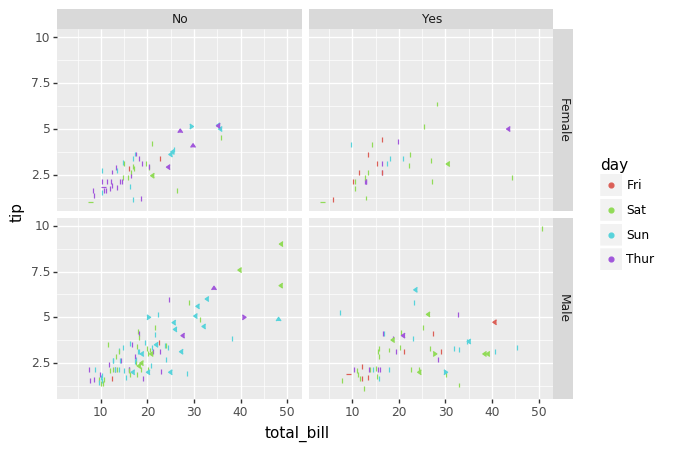

<ggplot: (-9223363299971751003)>

In [13]:
p = ggplot(tips_data) + geom_point(aes(x="total_bill", y="tip", color = "day", shape="size"))\
+ facet_grid(["sex", "smoker"])
p

Notice that size isn't shown on the legend. This is because it is still being recognized as an integer. You need it to be a string.

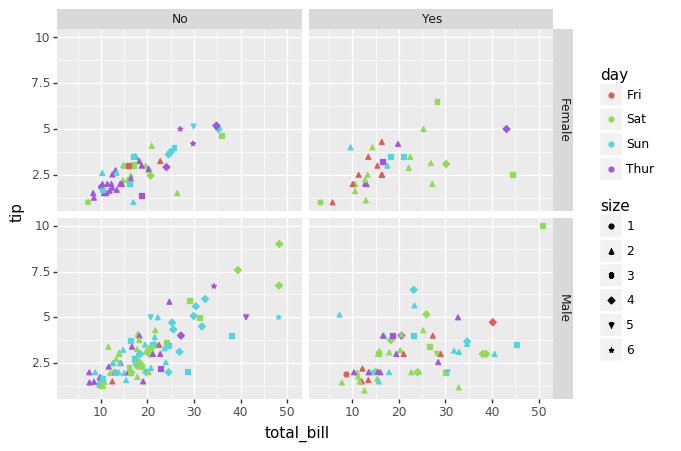

<ggplot: (8736973366413)>

In [14]:
tips_data["size"] = tips_data["size"].apply(lambda x: str(x))
p = ggplot(tips_data) + geom_point(aes(x="total_bill", y="tip", color = "day", shape="size"))\
+ facet_grid(["sex", "smoker"])
p

Now, let's see how we can plot a *box and whiskers plot* to visualize the summary statistics of a data set. Let's use the diamonds data set for it; and plot color vs. price for each clarity category.

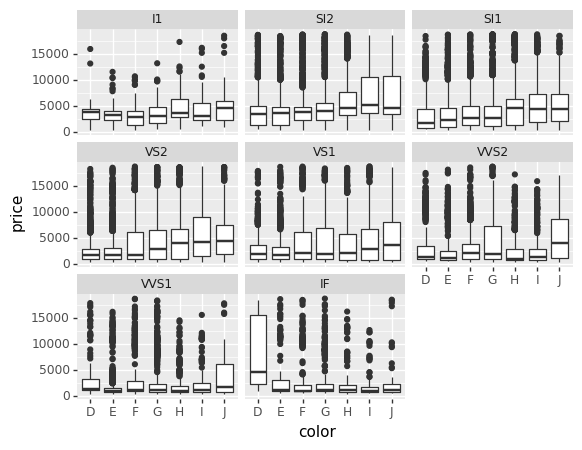

<ggplot: (8737014186188)>

In [15]:
from plotnine.data import diamonds
p3 = ggplot(diamonds, aes(x="color", y="price")) + geom_boxplot() + facet_wrap(["clarity"])
p3

Thick black line is the median, the edges of the box show the 25th and 75th quantiles, and the dots are the outliers. Because there are many outliers with very high values, scaling the y-axis with a log scale might be helpful. 

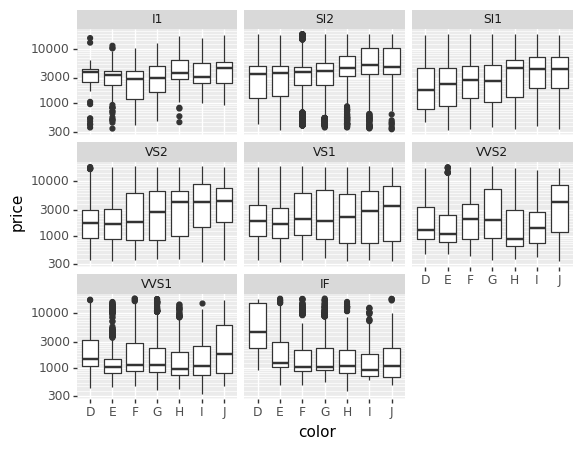

<ggplot: (-9223363299962815214)>

In [16]:
p3 + scale_y_log10()

This plot shows the statistics better, but it doesn't show the details of the distribution. We can use a violin plot to see the density.

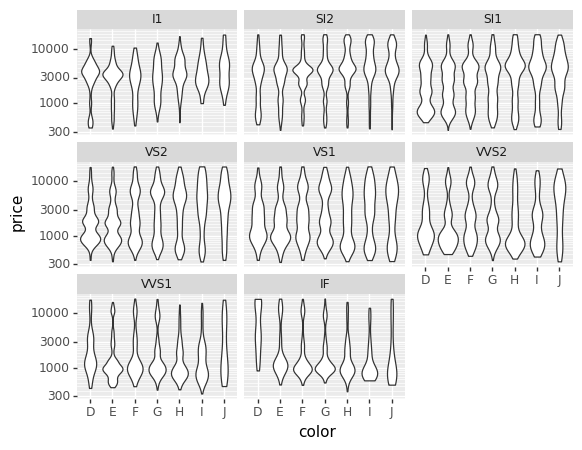

<ggplot: (-9223363299974234431)>

In [17]:
ggplot(diamonds, aes(x="color", y="price")) + geom_violin()+ facet_wrap(["clarity"]) + scale_y_log10()

Now we can see the distribution as the width at each point in this plot represents the frequency of the corresponding price.

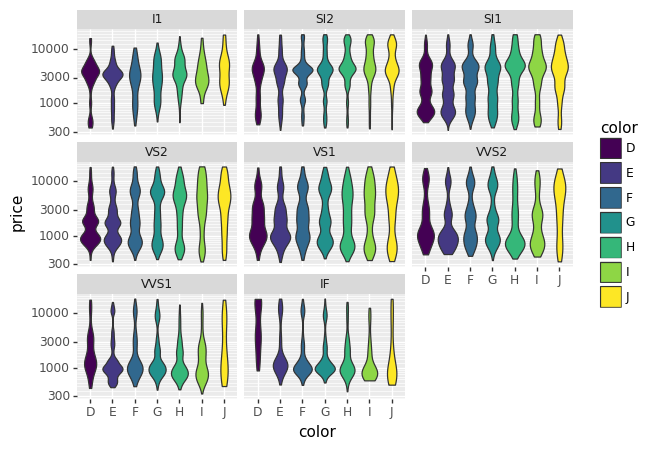

<ggplot: (-9223363299974349389)>

In [18]:
ggplot(diamonds, aes(x="color", y="price")) + geom_violin(aes(fill="color")) + facet_wrap(["clarity"]) + scale_y_log10()